In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
bottom_sp500_360 = pd.read_csv('stocks_rolling_deltaH/Bottom_components/deltaH_360.csv')
bottom_sp500_720 = pd.read_csv('stocks_rolling_deltaH/Bottom_components/deltaH_720.csv')
bottom_sp500_1080 = pd.read_csv('stocks_rolling_deltaH/Bottom_components/deltaH_1080.csv')

top_sp500_360 = pd.read_csv('stocks_rolling_deltaH/Top_components/deltaH_360.csv')
top_sp500_720 = pd.read_csv('stocks_rolling_deltaH/Top_components/deltaH_720.csv')
top_sp500_1080 = pd.read_csv('stocks_rolling_deltaH/Top_components/deltaH_1080.csv')


crypto_360 = pd.read_csv('crypto_rolling_deltaH/deltaH_360.csv')
crypto_720 = pd.read_csv('crypto_rolling_deltaH/deltaH_720.csv')
crypto_1080 = pd.read_csv('crypto_rolling_deltaH/deltaH_1080.csv')

In [21]:
import pyreadr
rw_deltaH_360_10000 = pd.DataFrame(pyreadr.read_r('deltaH_simulations/rw_deltaH_360_10000.rds')[None])
rw_deltaH_360_10000.columns = ['DeltaH']
rw_deltaH_720_10000 = pd.DataFrame(pyreadr.read_r('deltaH_simulations/rw_deltaH_720_10000.rds')[None])
rw_deltaH_720_10000.columns = ['DeltaH']
rw_deltaH_1080_10000 = pd.DataFrame(pyreadr.read_r('deltaH_simulations/rw_deltaH_360_10000.rds')[None])
rw_deltaH_1080_10000.columns = ['DeltaH']

In [27]:
q70_360 = rw_deltaH_360_10000.quantile(0.70)[0]
q90_360 = rw_deltaH_360_10000.quantile(0.90)[0]
q95_360 = rw_deltaH_360_10000.quantile(0.95)[0]
q99_360 = rw_deltaH_360_10000.quantile(0.99)[0]

q70_720 = rw_deltaH_720_10000.quantile(0.70)[0]
q90_720 = rw_deltaH_720_10000.quantile(0.90)[0]
q95_720 = rw_deltaH_720_10000.quantile(0.95)[0]
q99_720 = rw_deltaH_720_10000.quantile(0.99)[0]


q70_1080 = rw_deltaH_1080_10000.quantile(0.70)[0]
q90_1080 = rw_deltaH_1080_10000.quantile(0.90)[0]
q95_1080 = rw_deltaH_1080_10000.quantile(0.95)[0]
q99_1080 = rw_deltaH_1080_10000.quantile(0.99)[0]


<AxesSubplot:xlabel='date'>

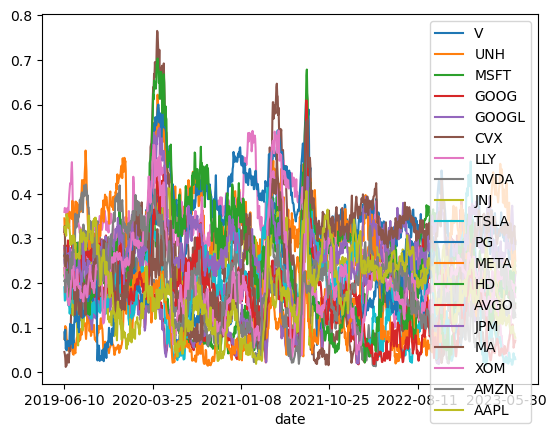

In [36]:
top_sp500_360.set_index('date').plot()

<AxesSubplot:xlabel='date'>

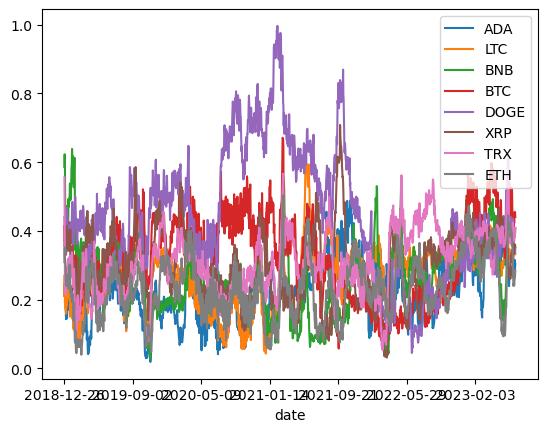

In [34]:
crypto_360.set_index('date').plot()

<AxesSubplot:xlabel='date'>

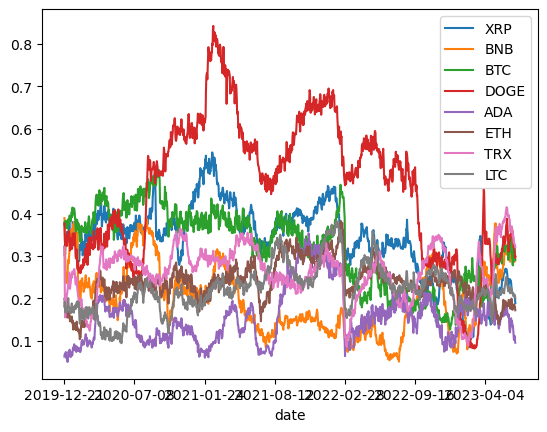

In [33]:
crypto_720.set_index('date').plot()

<AxesSubplot:xlabel='date'>

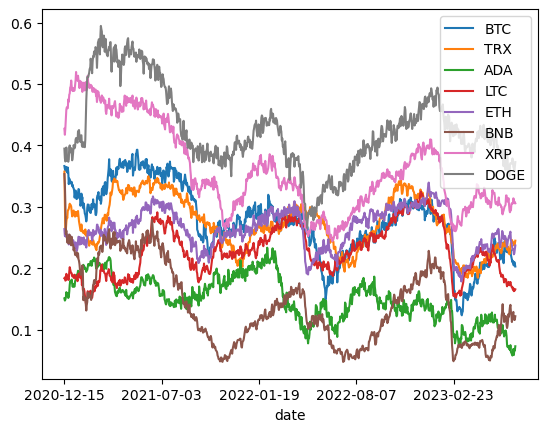

In [32]:
crypto_1080.set_index('date').plot()

In [38]:
from functools import reduce

crypto_360_melt = pd.melt(crypto_360,id_vars='date',value_name='DeltaH_360',var_name='ticker')
crypto_720_melt = pd.melt(crypto_720,id_vars='date',value_name='DeltaH_720',var_name='ticker')
crypto_1080_melt = pd.melt(crypto_1080,id_vars='date',value_name='DeltaH_1080',var_name='ticker')

bottom_sp500_360_melt = pd.melt(bottom_sp500_360,id_vars='date',value_name='DeltaH_360',var_name='ticker')
bottom_sp500_720_melt = pd.melt(bottom_sp500_720,id_vars='date',value_name='DeltaH_720',var_name='ticker')
bottom_sp500_1080_melt = pd.melt(bottom_sp500_1080,id_vars='date',value_name='DeltaH_1080',var_name='ticker')

top_sp500_360_melt = pd.melt(top_sp500_360,id_vars='date',value_name='DeltaH_360',var_name='ticker')
top_sp500_720_melt = pd.melt(top_sp500_720,id_vars='date',value_name='DeltaH_720',var_name='ticker')
top_sp500_1080_melt = pd.melt(top_sp500_1080,id_vars='date',value_name='DeltaH_1080',var_name='ticker')



crypto_list = [crypto_360_melt,crypto_720_melt,crypto_1080_melt]
bottom_sp500_list = [bottom_sp500_360_melt,bottom_sp500_720_melt,bottom_sp500_1080_melt]
top_sp500_list = [top_sp500_360_melt,top_sp500_720_melt,top_sp500_1080_melt]


bottom_sp500_merged = reduce(lambda left, right: pd.merge(left, right, on=['date','ticker']), bottom_sp500_list)
top_sp500_merged = reduce(lambda left, right: pd.merge(left, right, on=['date','ticker']), top_sp500_list)
crypto_list_merged = reduce(lambda left, right: pd.merge(left, right, on=['date','ticker']), crypto_list)





In [41]:
crypto_merged = reduce(lambda left, right: pd.merge(left, right, on=['date','ticker']), crypto_list)

In [42]:
bottom_sp500_merged['Asset_Class'] = "Stocks" 
bottom_sp500_merged['SP500_position'] = "Bottom" 

top_sp500_merged['Asset_Class'] = "Stocks" 
top_sp500_merged['SP500_position'] = "Top" 

crypto_merged['Asset_Class'] = "Crypto" 
crypto_merged['SP500_position'] = None





In [45]:
deltaH_asset_classets = pd.concat([bottom_sp500_merged,top_sp500_merged,crypto_merged])
deltaH_asset_classets['q70_360'] = q70_360
deltaH_asset_classets['q90_360'] = q90_360
deltaH_asset_classets['q95_360'] = q95_360
deltaH_asset_classets['q99_360'] = q99_360

deltaH_asset_classets['q70_720'] = q70_720
deltaH_asset_classets['q90_720'] = q90_720
deltaH_asset_classets['q95_720'] = q95_720
deltaH_asset_classets['q99_720'] = q99_720

deltaH_asset_classets['q70_1080'] = q70_1080
deltaH_asset_classets['q90_1080'] = q90_1080
deltaH_asset_classets['q95_1080'] = q95_1080
deltaH_asset_classets['q99_1080'] = q99_1080

In [46]:
deltaH_asset_classets

,date,ticker,DeltaH_360,DeltaH_720,DeltaH_1080,Asset_Class,SP500_position,q70_360,q90_360,q95_360,q99_360,q70_720,q90_720,q95_720,q99_720,q70_1080,q90_1080,q95_1080,q99_1080
0,2023-06-27,AOS,0.0566,0.0528,0.1636,Stocks,Bottom,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
1,2023-06-27,AOS,0.0566,0.0528,0.1636,Stocks,Bottom,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
2,2023-06-27,AOS,0.0566,0.0528,0.1636,Stocks,Bottom,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
3,2023-06-27,AOS,0.0566,0.0528,0.1636,Stocks,Bottom,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
4,2023-06-27,AOS,0.0566,0.0528,0.1636,Stocks,Bottom,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,2023-06-26,ETH,0.2411,0.1797,0.2306,Crypto,None,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
7420,2023-06-27,ETH,0.2583,0.186,0.2226,Crypto,None,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
7421,2023-06-28,ETH,0.2606,0.1776,0.2243,Crypto,None,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
7422,2023-06-29,ETH,0.2701,0.1796,0.2305,Crypto,None,0.1276,0.17481,0.197805,0.241003,0.0987,0.1326,0.1326,0.176903,0.1276,0.17481,0.17481,0.241003
